In [20]:
import numpy as np
import mglearn
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles, load_iris
from sklearn.model_selection import train_test_split

#### 분류 예측의 불확실성 추정

- sklearn에서는 decision_function과 predict_proba 2가지로 불확실성 추정이 가능하다.

#### 결정 함수

In [2]:
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# 예제를 위해 클래스의 이름을 'blue'와 'red'로 바꾼다.
y_named= np.array(['blue', 'red'])[y]

# 여러 개의 배열을 한꺼번에 train_test_split에 넣을 수 있다.
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=42)

# 그레이디언트 부스팅 모델 생성
gbrt = GradientBoostingClassifier(random_state=42)
gbrt.fit(X_train, y_train_named)



GradientBoostingClassifier(random_state=42)

In [3]:
print('X_test.shape:', X_test.shape)
print('결정 함수 결과 형태:', gbrt.decision_function(X_test).shape)

X_test.shape: (25, 2)
결정 함수 결과 형태: (25,)


- 이진 분류에서 decision_function 반환값의 크기는 (n_samples,)이며 각 샘플이 하나의 실수 값을 반환


In [4]:
print('결정 함수:\n', gbrt.decision_function(X_test)[:6])

결정 함수:
 [-4.3986226  -6.52670221  2.50733531 -4.15357718  2.91966345 -3.95344718]


- 위 값은 데이터 포인트가 양성 클래스에 속한다고 믿는 정도. 양수 값은 양성 클래스, 음수 값은 음성 클래스를 의미

In [5]:
print('임계치와 결정 함수 결과 비교:\n', gbrt.decision_function(X_test) > 0)
print('예측:\n', gbrt.predict(X_test))

임계치와 결정 함수 결과 비교:
 [False False  True False  True False False False  True  True  True False
 False  True False False False  True  True False False  True  True  True
 False]
예측:
 ['blue' 'blue' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red'
 'blue' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'blue' 'red'
 'red' 'red' 'blue']


- 이진 분류에서 음성 클래스는 항상 classes_속성의 첫 번째 원소, 양성 클래스는 두 번째 원소
- 따라서 predict의 결과를 온전히 재현하려면 classes_ 속성을 사용해야 한다.

In [6]:
# 불리언 값을 0과 1로 변환
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)

# classes에 인덱스로 사용
pred = gbrt.classes_[greater_zero]

# pred와 gbrt.predict의 결과를 비교
print('pred는 예측 결과와 같다:', np.all(pred == gbrt.predict(X_test)))

pred는 예측 결과와 같다: True


In [7]:
decision_function = gbrt.decision_function(X_test)

print('결정 함수 최솟값: {:.2f} 최댓값: {:.2f}'.format(np.min(decision_function), np.max(decision_function)))

결정 함수 최솟값: -7.75 최댓값: 4.11


- decision_function 값 범위는 데이터와 모델 파라미터에 따라 달라진다.

c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\min

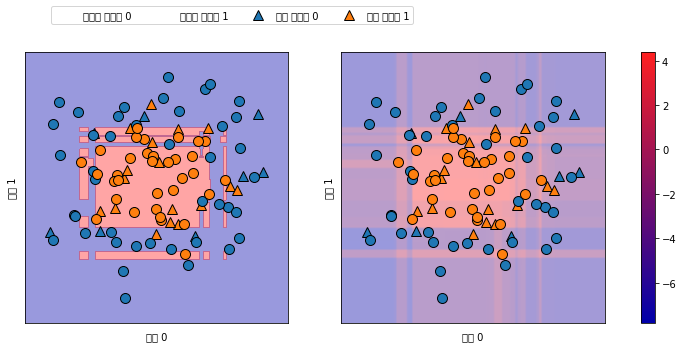

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)

scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)

    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)

    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')

cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(['테스트 클래스 0', '테스트 클래스 1', '훈련 클래스 0', '훈련 클래스 1'], ncol=4, loc=(.1, 1.1))

#### 예측 확률

In [9]:
print('확률 값의 형태:', gbrt.predict_proba(X_test).shape)

확률 값의 형태: (25, 2)


- predict_proba의 출력은 각 클래스에 대한 확률이고 decision_function의 출력보다 이해하기 쉽다
- 이진 분류에서의 값의 크기는 항상 (n_samples, 2)

In [10]:
print('예측 확률:\n', gbrt.predict_proba(X_test[:6]))

예측 확률:
 [[0.98785505 0.01214495]
 [0.99853831 0.00146169]
 [0.07534554 0.92465446]
 [0.9845348  0.0154652 ]
 [0.05119004 0.94880996]
 [0.98117282 0.01882718]]


- 순서대로 첫 번째, 두 번째 클래스의 예측확률이며 출력은 항상 0~1사이의 값, 확률의 합은 항상 1이다.

c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\min

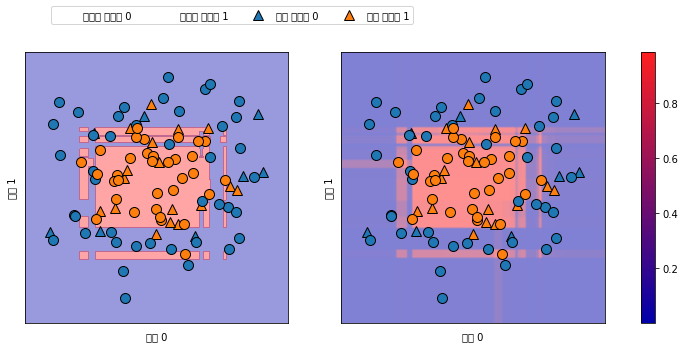

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)

scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)

    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)

    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')

cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(['테스트 클래스 0', '테스트 클래스 1', '훈련 클래스 0', '훈련 클래스 1'], ncol=4, loc=(.1, 1.1))

#### 다중 분류에서의 불확실성

In [15]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=42)
gbrt.fit(X_train, y_train)

print('결정 함수의 결과 형태:', gbrt.decision_function(X_test).shape)

print('결정 함수 결과:\n', gbrt.decision_function(X_test)[:6, :])

결정 함수의 결과 형태: (38, 3)
결정 함수 결과:
 [[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99064144 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


- 다중 분류에서의 decision_function의 결괏값 크기는 (n_samples, n_classes)

In [16]:
print('가장 큰 결정 함수의 인덱스:\n', np.argmax(gbrt.decision_function(X_test), axis=1))

print('예측 :\n', gbrt.predict(X_test))

가장 큰 결정 함수의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측 :
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [17]:
print('예측 확률:\n', gbrt.predict_proba(X_test)[:6])

print('합:', gbrt.predict_proba(X_test)[:6].sum(axis=1))


예측 확률:
 [[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09817546 0.11005928 0.79176526]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
합: [1. 1. 1. 1. 1. 1.]


In [19]:
print('가장 큰 결정 함수의 인덱스:\n', np.argmax(gbrt.predict_proba(X_test), axis=1))

print('예측 :\n', gbrt.predict(X_test))

가장 큰 결정 함수의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측 :
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


- 

In [21]:
logreg = LogisticRegression()

named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)

print('훈련 데이터에 있는 클래스 종류:', logreg.classes_)
print('예측:', logreg.predict(X_test)[:10])

argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)

print('가장 큰 결정 함수의 인덱스:', argmax_dec_func[:10])

print('인덱스를 classes_에 연결:', logreg.classes_[argmax_dec_func][:10])

훈련 데이터에 있는 클래스 종류: ['setosa' 'versicolor' 'virginica']
예측: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수의 인덱스: [1 0 2 1 1 0 1 2 1 1]
인덱스를 classes_에 연결: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


c:\Users\dbswo\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 최종 요약

- 최근접 이웃
    - 작은 데이터셋일 경우, 기본 모델로서 좋고 설명이 쉬움
  #
- 선형 모델

    - 대용량 데이터셋 가능, 고차원 데이터에 가능
  #
- 나이브 베이즈
    - 분류만 가능, 선형 모델보다 훨씬 빠름, 대용량 및 고차원 데이터에 가능, 선형 모델보다 정확성 떨어짐
  #
- 결정 트리
    - 매우 빠름, 데이터 스케일 조정 필요 없음, 시각화 좋고 설명하기 좋음
  #
- 랜덤 포레스트
    - 결정 트리 하나보다 항상 좋은 성능, 매우 안정적이며 강력함, 데이터 스케일 조정 필요 없음, 고차원 희소 데이터에는 잘 안 맞음
  #
- 그레이디언트 부스팅 결정 트리
    - 랜덤 포레스트보다 조금 더 좋은 성능, 학습은 보다 느리나 예측은 빠르고 메모리 조금 사용, 매개변수 튜닝이 보다 많이 필요한 것이 단점
  #
- 서포트 벡터 머신
    - 비슷한 의미의 특성으로 이뤄진 중간 규모 데이터셋에 잘 맞음. 데이터 스케일 조정 필요, 매개변수에 민감
  #
- 신경망
    - 특별히 대용량 데이터셋에서 매우 복잡한 모델 만들 수 있음, 매개변수 선택과 데이터 스케일에 민감, 큰 모델은 학습이 오래 걸림